<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/10_Image_Prep_for_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
# KERNELS -> FILTER

In [0]:
# 3 imgs with various filters
i1 = np.array([np.array([200,200]), np.array([200,200])]) # FULL IMAGE
i2 =  np.array([np.array([200,200]), np.array([0,0])]) # Top half image
i3 =  np.array([np.array([200,0]), np.array([200,0])]) # Left Half Image

In [0]:
# KERNELS HELP US DETECT PATTERNS
# horizontal kernel
kh = np.array([np.array([2,2]), np.array([-2,-2])]) # horizontal EDGE
# vertical kernel
kv = np.array([np.array([2,-2]), np.array([2,-2])]) # VERTICAL EDGE

In [0]:
def mf(img, kernel):
  return np.sum(np.multiply(img,kernel))


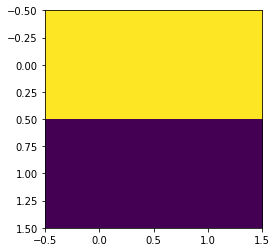

In [20]:
plt.figure()
plt.imshow(i2)


In [22]:
print(fm(i2,kh)) # NON zero value means the filter detected it's shape 

800


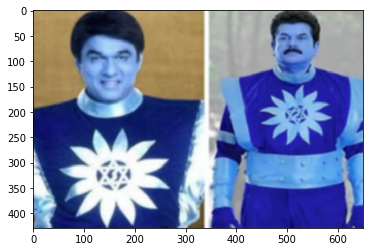

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('burp.jpg')
# WINDOW SIZE-> HYPERPARAMETER
# NO. of times to apply the kernel -> In NN, we can decide that by deciding no. of layers!
# AVERAGING RULE -> AVERAGES TO BLUR OUT AN IMAGE 
kernel = np.ones((5,5), np.float32) / 25 # /25 because 5X5 = 25 elements. Linear Kernel. 
img2 = cv2.filter2D(img, -1, kernel)
plt.imshow(img2) 


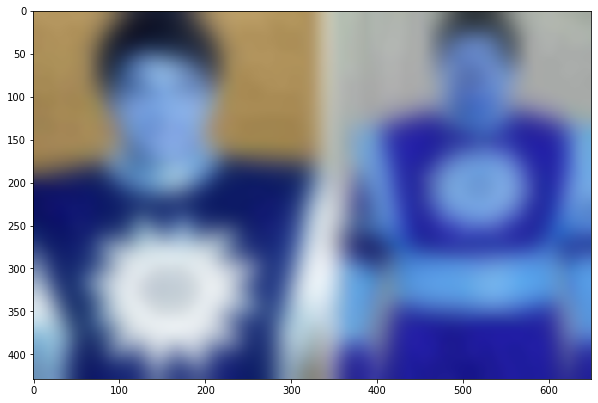

In [55]:
img2 = cv2.filter2D(img, -1, kernel)
plt.figure(figsize=(10,10))
for i in range(100): # Face + Background Blurring 
  img2 = cv2.filter2D(img2, -1, kernel) # Further blurring 
plt.imshow(img2)

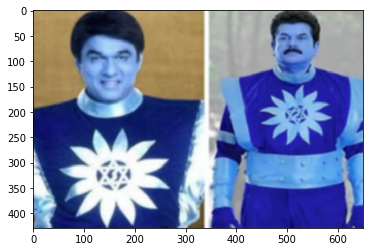

In [28]:
img_blur = cv2.blur(img, (5,5))
plt.imshow(img_blur)

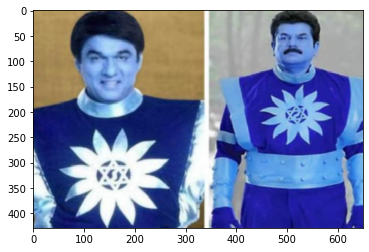

In [48]:
# Gaussian Filter
img2 = cv2.GaussianBlur(img, (5,5),0)
for i in range(1000):
  img2 = cv2.GaussianBlur(img2, (5,5),0) # Gaussian Kernel-> faster than linear kernel,LESS LOSSY than Normal Kernel
  # For censoring -> average. For transmitting compressed data over network -> Gaussian blurring. 
  # Gaussian blurring -> reversable -> Gaussian Equation 
plt.imshow(blur)

# Normal Average Kernel -> Lossy Compression, slower
# Gaussian Kernel -> Lossless Compression, faster 

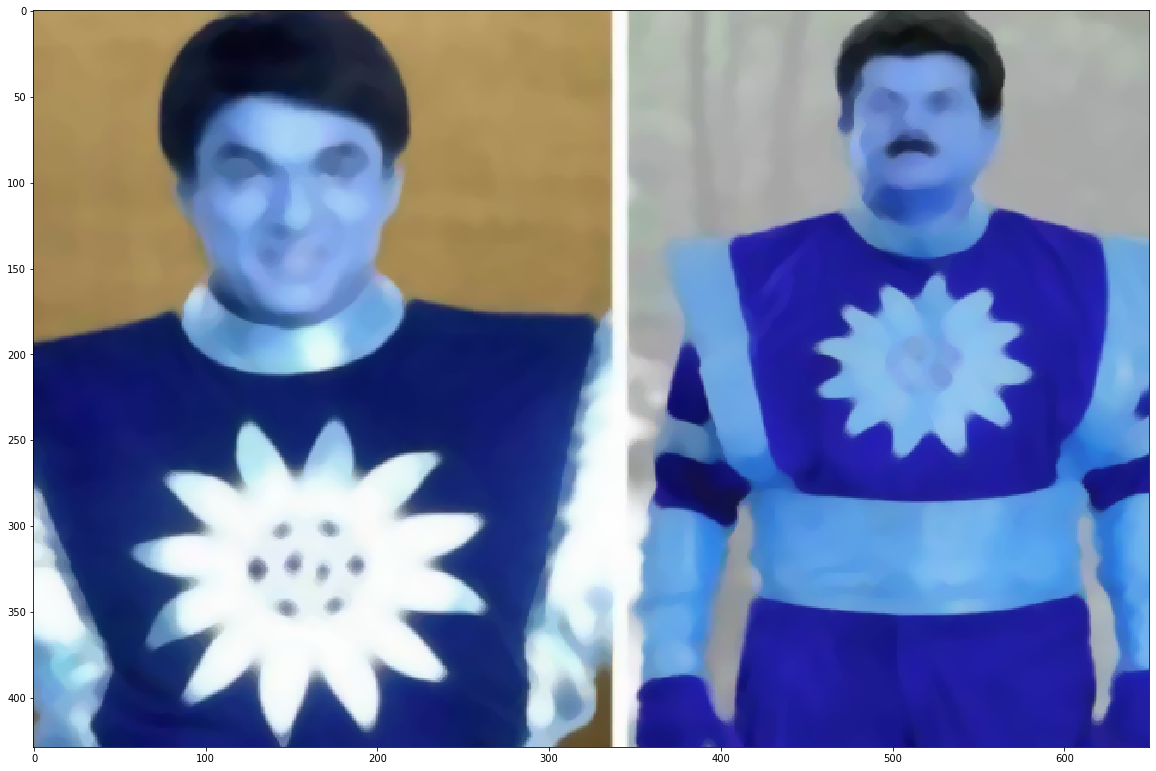

In [56]:
img2 = cv2.medianBlur(img,5) # noise from median, one of the lossiest compressions. Thats why
# instead of window, we maintain noise factor to avoid losing majority info from the image 
plt.figure(figsize=(20,20))
for i in range(10):
  img2 = cv2.medianBlur(img2,5)
plt.imshow(img2)

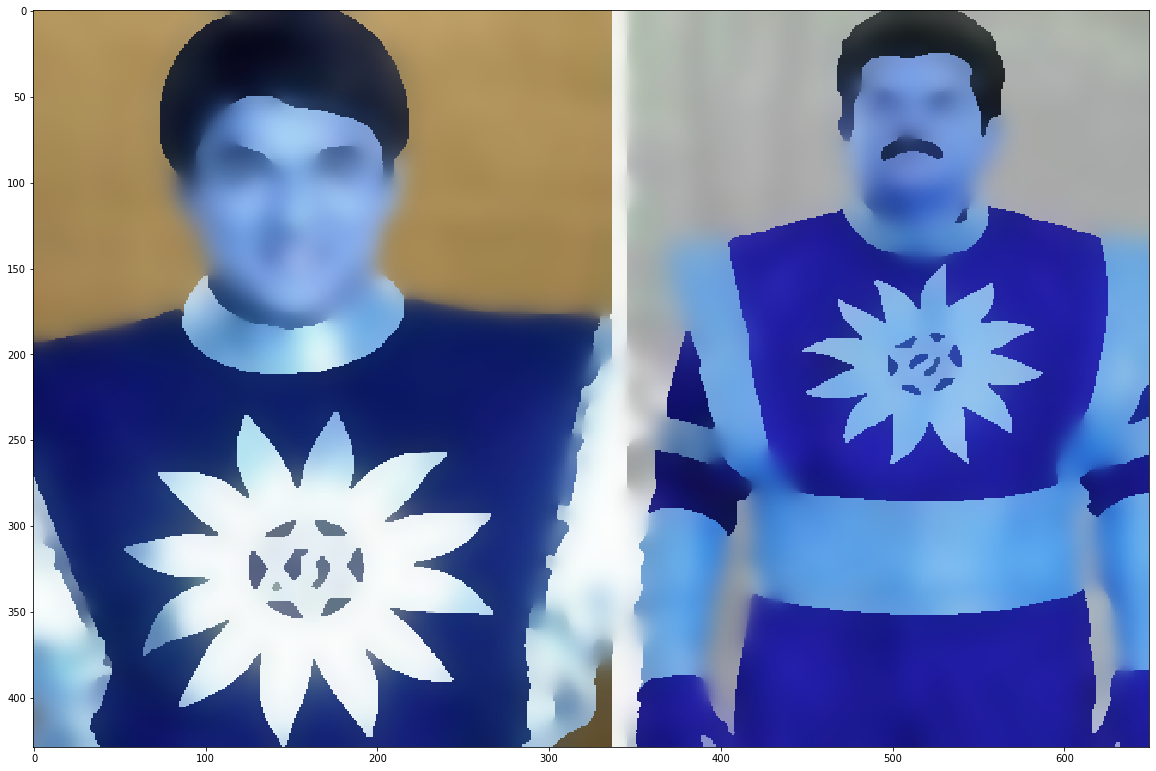

In [59]:
img2 = cv2.bilateralFilter(img,9, 75,75) # Random bits of info- twin bits of info are lost
plt.figure(figsize=(20,20))
for i in range(10):
  img2 = cv2.bilateralFilter(img2,9,75,75)
plt.imshow(img2)
# +, * 

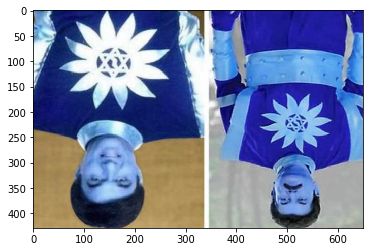

In [61]:
flipped_v = np.flipud(img)
plt.imshow(flipped_v)


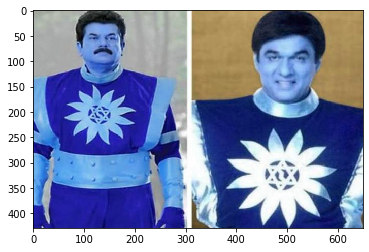

In [64]:

flipr = np.fliplr(img)
plt.imshow(flipr)

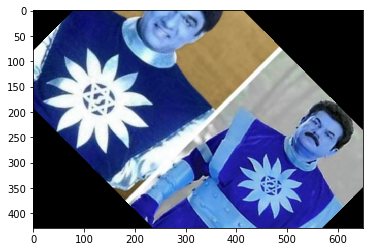

In [66]:
from skimage.transform import rotate
rimg = rotate(img, angle=-45) 
plt.imshow(rimg) 
#After rotation, certain pixels will be lost
# this creates a GAP!!!!
# THIS IS COMPARABLE TO <PAD> in STRINGS-> wherever we had undesired strings, we made them 0
# <PAD> in images refers to the NULL spaces created due to image transformations 


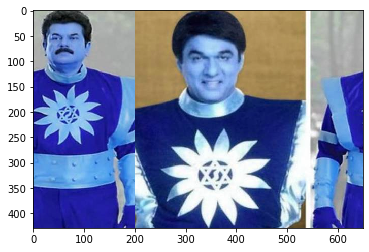

In [80]:
# SHIFTING -> makes sure that your object on any position in the image could be detected
# original pos was (x,y), then shifting by d will create a new (x+dx, y+dy) point 
# dx, dy are hyperparameters-> ALL of those combinations will be tried 
# Affine Transformation 
from skimage.transform import AffineTransform
import skimage
# Affine Transformation warps the image with 'SHIFT WITH FILL'

transformation = AffineTransform(translation=(-200,0)) # dx = -200, y = 0
warpedImage = warp(img, transformation, mode="wrap")
plt.imshow(warpedImage) 

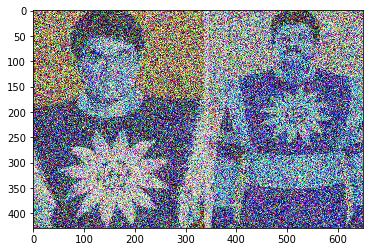

In [83]:
# NOISE -> adding disturbance to your data so that dirty data could also be learnt upon 
# skimage has an inbuilt function to add random noise to your data
from skimage.util import random_noise
noisyImage = random_noise(img)
for i in range(20):
  noisyImage = random_noise(noisyImage)

plt.imshow(noisyImage)
# CURROPTION MEANS THAT EVEN POOR QUALITY OR LOW-RES or LO-FI images will also be understood by your network
# Deep Learning CCTV cameras 
# DEEP SPACE, Mine, Sea explorations 
# Air Transport -> routes are full of noises -> random bird could be on the plane path
# Infrared image -> normalize and scale to RGB for pilot only display purpose, desired efficiency of 
# clicking bird in noisy data and predicting collision 


In [0]:
# KERAS/OpenCV/Numpy/Scipy -> ImageDataGenerator, ImageAugmentation -> this takes care of creating all the above augmentations
# AUGMENTATIONS <- ALL filters are AUGMENTATIONS 
# read the pdf via python https://tabula-py.readthedocs.io/en/latest/getting_started.html#example
# VGG implementation -> use these 2 functions above
# BULK of images 
